In [32]:
%pylab
%matplotlib inline
matplotlib.rcParams['text.usetex'] = False

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Метод конечных объёмов

* Универсальный метод для решения уравнений в дивергентной форме (в форме закона сохранения)

$$
\frac{\partial f}{\partial t} + \nabla_{\vec r, \vec p}\left(\mathbf Af\right) = 0
$$
$$
\mathbf A = \left\{\vec v, q\vec E + \frac{q}{c}\left[\vec v \times \vec B\right]\right\}
$$

* **Поток**:
$$
\mathbf\Phi(t, \vec{r}, \vec{p}, f) \equiv \mathbf{A}f
$$

## Дискретизация

* Пусть задана сетка:
$$
\left\{x_i\right\}_{i=0\dots N}
$$

* Каждая точка сетки окружается **контрольными (конечными) объёмами**
$$
\left(x_{i-\frac12}, x_{i+\frac12}\right)
$$
$$
x_{i+\frac12} \equiv \frac{x_{i+1}-x_i}{2}
$$
$$
x_{i-\frac12} \equiv \frac{x_{i}-x_{i-1}}{2}
$$

* Функция аппроксимируется средними по этим объёмам
$$
f_i^n \equiv \frac{1}{x_{i+\frac12}-x_{i-\frac12}}\int\limits_{x_{i-\frac12}}^{x_{i+\frac12}}f(x, t^n)dx
$$

## Базовая идея метода

$$
\frac{\partial f}{\partial t} + \frac{\partial \Phi(f, x, t)}{\partial x} = 0
$$

* Интегрируем по каждому контрольному объёму:
$$
\frac{\rm d}{{\rm d} t} \int\limits_{x_{i-\frac12}}^{x_{i+\frac12}}f(x, t)dx + \int\limits_{x_{i-\frac12}}^{x_{i+\frac12}}\frac{\partial \Phi(f, x, t)}{\partial x}dx = 0
$$

* И пользуемся теоремой Остроградского — Гаусса:
$$
\left(x_{i+\frac12}-x_{i-\frac12}\right)\frac{\rm d}{{\rm d} t} f_i + \Phi_{i+\frac12}(t) - \Phi_{i-\frac12}(t) = 0
$$

## Схема Годунова

* Интегрируем по времени
$$
f_i^{n+1} - f_i^n = -\frac{1}{x_{i+\frac12}-x_{i-\frac12}}\int\limits_{t_n}^{t_{n+1}}\left[\Phi_{i+\frac12}(t) - \Phi_{i-\frac12}(t)\right]dt
$$

* Используем решение (точное или численное) так называемой **задачи Римана**

### Задача Римана

* Задача Римана — задача об эволюции разрыва

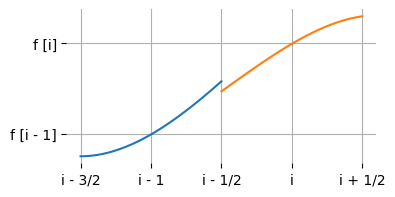

In [66]:
x1 = np.linspace(0, 0.5, 100)
f1 = -x1**3 + 2*x1**2 + 2
x2 = np.linspace(0.5, 1, 100)
f2 = -1.2*x2**3 + 1.9*x2**2 + 2

fig = plt.figure(figsize=[4, 2])
ax = plt.axes()

ax.plot(x1, f1)
ax.plot(x2, f2)

ax.set_frame_on(False)

ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['i - 3/2', 'i - 1', 'i - 1/2', 'i', 'i + 1/2'])
ax.set_yticks([f1[50], f2[50]])
ax.set_yticklabels(['f [i - 1]', 'f [i]'])

ax.grid()

plt.show()

$$
\int\limits_{t_n}^{t_{n+1}}\Phi_{i-\frac12}(t)dt = \Delta t\Phi_{\rm Riemann}(f_{i-1}^n, f_i^n, x_{i-1}, x_i, t^n)
$$

* Свойства решения задачи Римана:

$$
\Phi_{\rm Riemann}(f_{i-1}^n, f_i^n) = \Phi(f_{i-1}^n) \iff f_{i-1}^n = f_i^n
$$
$$
\frac{\partial\Phi_{\rm Riemann}}{\partial f_{i-1}^n} \ge 0
$$
$$
\frac{\partial\Phi_{\rm Riemann}}{\partial f_i^n} \le 0
$$

* В простейшем случае (кусочно-константная апроксимация):

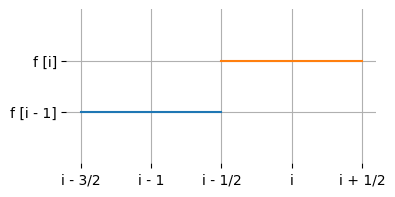

In [67]:
x1 = np.linspace(0, 0.5, 100)
f1 = 0*x1
x2 = np.linspace(0.5, 1, 100)
f2 = x2/x2

fig = plt.figure(figsize=[4, 2])
ax = plt.axes()

ax.plot(x1, f1)
ax.plot(x2, f2)

ax.set_frame_on(False)

ax.set_ylim(-1,2)

ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['i - 3/2', 'i - 1', 'i - 1/2', 'i', 'i + 1/2'])
ax.set_yticks([f1[50], f2[50]])
ax.set_yticklabels(['f [i - 1]', 'f [i]'])

ax.grid()

plt.show()

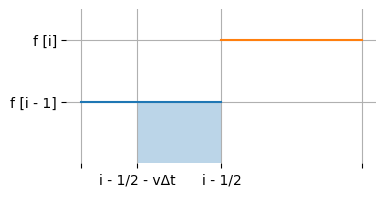

In [90]:
x1 = np.linspace(0, 0.5, 100)
f1 = (1+x1)/(1+x1)
x2 = np.linspace(0.5, 1, 100)
f2 = 2*x2/x2

fig = plt.figure(figsize=[4, 2])
ax = plt.axes()

ax.plot(x1, f1)
ax.plot(x2, f2)
ax.fill_between(x1[40:], f1[40:], alpha=0.3)

ax.set_frame_on(False)

ax.set_ylim(0,2.5)

ax.set_xticks([0, 0.2, 0.5, 1])
ax.set_xticklabels(['', 'i - 1/2 - vΔt', 'i - 1/2', ''])
ax.set_yticks([f1[50], f2[50]])
ax.set_yticklabels(['f [i - 1]', 'f [i]'])

ax.grid()

plt.show()

$$
\Phi_{\rm Riemann}(f_{i-1}^n, f_i^n, x_{i-1}, x_i, t^n) =
$$
$$
\left\{
\begin{array}{lcl}
\Phi(f_{i-1}^n, x_{i-1}, t^n) = vf_{i-1} & \iff & \frac{\partial \Phi}{\partial f} = v > 0\\
\Phi(f_i^n, x_i, t^n) = vf_{i} & \iff & \frac{\partial \Phi}{\partial f} = v < 0
\end{array}\right.
$$

### Примечания

#### Достоинства

 * Точно выполняется закон сохранения числа частиц

 * Выполняется принцип максимума

 * Вся «физика» — в задаче Римана

#### Недостатки

* Схема первого порядка точности

* Схема чрезмерно диффузна (резкие границы размываются со временем)

* Требует наложения условия Куранта: $\Delta t \le \Delta x/v$

### Увеличение точности схемы

* Вместо кусочно-константной можно использовать аппроксимацию более высокого порядка, например, кусочно-линейную центрально-взвешенную схему

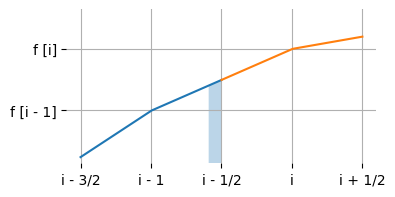

In [109]:
x1 = np.linspace(0, 0.5, 100)
f1 = np.array(x1)
f1[:51] = 3*x1[:51] + 0.1
f1[50:] = 2*(x1[50:]-x1[50]) + f1[50]
x2 = np.linspace(0.5, 1, 100)
f2 = np.array(x2)
f2[:51] = 2*(x2[:51]-x2[0]) + f1[-1]
f2[50:] = 0.8*(x2[50:]-x2[50]) + f2[50]

fig = plt.figure(figsize=[4, 2])
ax = plt.axes()

ax.plot(x1, f1)
ax.plot(x2, f2)
ax.fill_between(x1[90:], f1[90:], alpha=0.3)

ax.set_frame_on(False)

ax.set_ylim(0,2.5)

ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['i - 3/2', 'i - 1', 'i - 1/2', 'i', 'i + 1/2'])
ax.set_yticks([f1[50], f2[50]])
ax.set_yticklabels(['f [i - 1]', 'f [i]'])

ax.grid()

plt.show()

$$
\Phi_{\rm Riemann}(f_{i-1}, f_i) \approx \Phi\left(\frac{f_i+f_{i-1}}{2}\right) = v\frac{f_i+f_{i-1}}{2}
$$

* Проблема: Все схемы Годунова более высокого порядка, чем первый, не обеспечивают сохранение **монотонности**

### Сохранение монотонности

* Схема сохраняет монотонность, если для любой возрастающей (убывающей) $\{f_i^n\} \implies \{f_i^{n+1}\}$ так же возрастает (убывает).

* Можно показать [Harten, J. Comput. Phys., 49, 357 (1983)], что схема сохраняет монотонность тогда и только тогда, когда она обеспечивает **убывание полной вариации** (Total variation diminishing, TVD)

* Полной вариацией называется величина
$$
{\rm TV} = \int\left|\frac{\partial f}{\partial x}\right|dx
$$

* Или в дискретном случае
$$
{\rm TV} = \sum\left|f_{i} - f_{i-1}\right|
$$

* Схема обеспечивает убывание полной вариации, если
$$
{\rm TV}(f^{n+1}) \le {\rm TV}(f^n)
$$

* Для обеспечения TVD вводят **ограничители потока** (или наклона)

### Ограничители потока

* Идея: использовать схему высокого порядка там, где функция гладкая, и схему первого порядка там, где функция терпит скачки

$$
\Phi_{\rm Riemann}(f_{i-1}, f_i) = \Phi\left(\tilde f_{i-\frac12}\right)
$$

$$
\tilde f_{i-\frac12} = \left\{
\begin{array}{ll}
f_{i-1} + \phi(r_{i-1})\frac{f_i-f_{i-1}}{2} \iff \frac{\partial \Phi}{\partial f} > 0\\
f_i - \phi(r_i)\frac{f_i-f_{i-1}}{2} \iff \frac{\partial \Phi}{\partial f} < 0
\end{array}\right.
$$
$$
r_i = \frac{f_i - f_{i-1}}{f_{i+1} - f_i}
$$

$$
\phi(r_i = 0) = 0
$$
$$
\phi(r_i = 1) = 1
$$

#### Ограничители потока, обеспечивающие TVD

* Чтобы ограничитель потока обеспечивал убывание полной вариации, он должен удовлетворять следующим условиям:
 * $r \le \phi(r) \le 2r \iff 0 \le r \le 1$
 * $1 \le \phi(r) \le r \iff 1 \le r \le 2$
 * $1 \le \phi(r) \le 2 \iff r \ge 2$

* Симметричный ограничитель:
$$
\frac{\phi(r)}{r} = \phi\left(\frac{1}{r}\right)
$$

#### Примеры

* ван Леера [Van Leer, J. Comput. Phys., 14 (4), 361 (1974)]
 $$
 \phi(r) = \frac{r+|r|}{1+|r|}
 $$

 * монотонизированная центрально-взвешенная схема [Van Leer, J. Comput. Phys., 23 (3), 263 (1977)]
 $$
 \phi(r) = \max\left(0, \min\left(2r, \frac{1+r}{2}, 2\right)\right)
 $$

 * minmod [Roe, Annu. Rev. Fluid Mech., 18, 337 (1986)]
 $$
 \phi(r) = \max(0, \min(1,r))
 $$

#### Другие ограничители потока

* См. https://en.wikipedia.org/wiki/Flux_limiter

<img src="../pics/flux_limiters.png" width="50%" />

#### Примечания

* Ограничители потока дополнительно могут обеспечивать выполнение приципа максимума

* Можно обобщить на аппроксимации более высокого порядка

* Универсального ограничителя не существует

# Полулагранжевый метод

* Semi-Lagrangian (SL)

* Специфичен для гиперболических уравнений первого порядка

* Задействует метод характеристик (другими словами, лагранжево представление)

$$
\frac{\partial f}{\partial t} + \mathbf A(\mathbf x, t)\cdot\nabla_{\mathbf x}f = 0
$$

$$
\frac{d\mathbf X}{dt} = \mathbf A(\mathbf X, t)
$$
$$
\mathbf X(t = s) = \mathbf x
$$

$$
\vec X = \vec X(t; \vec x, s)
$$

$$
\frac{d}{dt}f(\mathbf X(t), t) = \frac{\partial f}{\partial t} + \frac{d\mathbf X}{dt}\cdot\nabla_{\mathbf X}f \equiv
\frac{\partial f}{\partial t} + \mathbf A(\mathbf X, t)\cdot\nabla_{\mathbf X}f = 0
$$

$$
f(\mathbf X(t; \mathbf x, s), t) = f(\mathbf X(s; \mathbf x, s), s) = f(\mathbf x, s)
$$

### Классическая реализация

* Cheng, Knorr, J. Comput. Phys. 22, 330 (1976)

$$
\frac{\partial f}{\partial t} + v(x,t)\frac{\partial f}{\partial x} = 0
$$

* Вводим сетку
$$
\left\{x_i\right\}_{i=1\dots N}
$$

* Находим, в какой точке $X_i$ стартовала характеристика, пересекающая точку $x_i$ в момент времени $t^{n+1}$
$$
\frac{dX}{dt} = v(X, t)
$$
$$
X_i = X_i(t^{n}; x_i, t^{n+1})
$$

* Используем любую удобную интерполяцию, чтобы определить значение функции в точке $X_i$ в момент времени $t^{n}$, и пользуемся равенством
$$
f_i^{n+1} \equiv f(x_i, t^{n+1}) = f(X_i(t^n; x_i, t^{n+1}), t^n) \equiv f(X_i, t^n)
$$

### Интерполяция

* Линейная интерполяция — чрезмерно диффузна

* Классический и самый распространённый вариант: **кубические B-сплайны**

* Кубический B-сплайн — это кусочно-заданная функция, составленная из полиномов третьей степени, всюду непрерывная вместе c первой и второй производными

$$
f_{\rm CBS} = \sum_{i=0}^{N} a_i S^3(x - x_i)
$$

$$
S^3(x) = \frac{1}{6}\left\{
\begin{array}{lcl}
4 - 6\left(\frac{|x|}{\Delta x}\right)^2 + 3\left(\frac{|x|}{\Delta x}\right)^3 & \iff & 0 \le |x| \le \Delta x\\
\left(2 - \frac{|x|}{\Delta x}\right)^3 & \iff & \Delta x \le |x| \le 2\Delta x\\
0 & \iff & |x| \ge 2\Delta x\\
\end{array}
\right.
$$

* Коэффициенты $a_i$ находятся из условия
$$
f(x_j) = f_{\rm CBS}(x_j) = \sum_{i=0}^{N} a_i S^3(x_j - x_i)
$$

* Это система линейных алгебраических уравнений (N+1)-го порядка

### Примечания

#### Достоинства

* Легко обобщается на многомерный случай [Sonnendrücker et al., J. Comp. Phys. 149, 201 (1999)]

* Для второго порядка точности по времени требуется или предиктор-корректор, или сохранение значений $f_i^{n-1}$ (там же)

* Условие Куранта заменяется на обычно более слабое $|(\partial v/\partial x)\Delta t| < 1$ (если $v$ не зависит явно от $x$ — шаг по времени может быть произвольным (!))

* Метод сохраняет число частиц и импульс

#### Недостатки

* Не гарантирует сохранение принципа максимума (зависит от интерполяции)

* Построение сплайна вычислительно затратно (нелокальная операция)

## Консервативный полулагранжевый метод

* Positivity Flux Conservative (PFC) [Filbet et al., J. Comp. Phys. 172, 166 (2001)]

* Объединяет метод конечных объёмов и полулагранжев метод:

$$
\int\limits_{t^n}^{t^{n+1}}\Phi_{i-\frac12}dt = \int\limits_{X_{i-\frac12}}^{x_{i-\frac12}} f(x, t^n) dx
$$
* Здесь $X_{i-\frac12}$ — результат решения уравнения для характеристики

* При введении ограничителей потока схема обеспечивает выполнение принципа максимума и убывание полной вариации даже при использовании локальной интерполяции

## Литература

### Метод конечных объёмов
* R. J. LeVeque. _Finite Volume Methods for Hyperbolic Problems_. Cambridge University Press. (2004)

### Полулагранжевый метод
* Eric Sonnendrücker. _Numerical methods for the Vlasov equations_. Lecture notes. 2013.
* G. Dimarco, L. Pareschi. _Numerical methods for kinetic equations_. Acta Numerica, Cambridge University Press (CUP), 2014, pp. 369-520.

### Кубические B-сплайны
* W. H. Press, S. A. Teukolsky, W. T. Vetterling and B. P. Flannery. _Numerical Recipes: The Art of Scientific Computing_. 2007

## Дома

* Для трёх рассмотренных ограничителей потока выписать в явном виде $\tilde f_{i-\frac12}$